# Démonstration

Nous présentons notre implémentation de l'algorithme Random Forest. 


## De quoi s'agit-il ?
L'algorithme Random Forest est une méthode d'apprentissage automatique qui construit plusieurs arbres de décision et combine leurs prédictions pour obtenir des résultats plus précis et robustes. Il utilise l'échantillonnage aléatoire et la sélection aléatoire de variables pour réduire la corrélation entre les arbres.

### Chargement du dataset

In [1]:
import os
import sys

if os.getcwd().endswith("docs"):
    sys.path.append(os.path.join(os.getcwd(), ".."))

from ias.Datasets import Emnist
from ias import RandomForest, DecisionTree, PCA, split_dataset
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

### Prétraitement

In [2]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)
pca = PCA(0.9)

pca.fit(emnist_train_x)
emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

### Traitement par Random Forest

In [3]:
emnist_forest = RandomForest(tree_number=50, max_depth=7, training_subset_size=250, do_bagging=True)
emnist_forest.fit(emnist_compressed_train_x, emnist_train_y)

### Traitement par simple Decision Tree

In [4]:
emnist_tree = DecisionTree(max_depth=8, do_bagging=True, splitter="best")
emnist_tree.fit(emnist_compressed_train_x, emnist_train_y)

### Comparaison des résultats

Accuracy score : 0.430


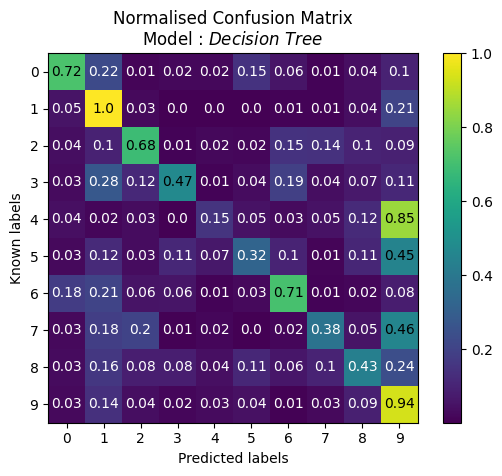

In [5]:
tree_prediction_y = emnist_tree.predict(emnist_compressed_test_x)
conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, tree_prediction_y)
fig1, ax1 = show_confusion_matrix(conf_matrix, Emnist.class_names, round_decimal=2)
ax1.set_title("Normalised Confusion Matrix\nModel : $Decision\ Tree$")

print(f"Accuracy score : {accuracy_score(emnist_test_y, tree_prediction_y):.3f}")

Accuracy score : 0.775


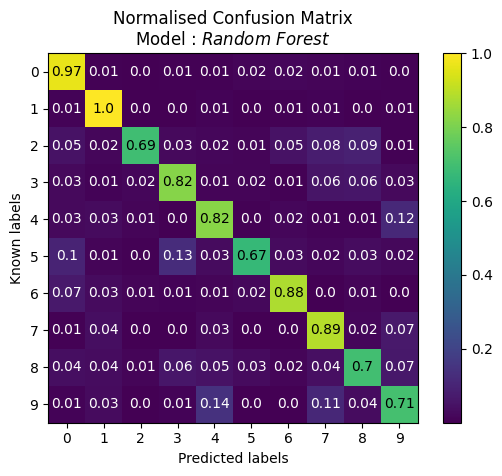

In [6]:
forest_prediction_y = emnist_forest.predict(emnist_compressed_test_x)
conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, forest_prediction_y)
fig2, ax2 = show_confusion_matrix(conf_matrix, Emnist.class_names, round_decimal=2)
ax2.set_title("Normalised Confusion Matrix\nModel : $Random\ Forest$")

print(f"Accuracy score : {accuracy_score(emnist_test_y, forest_prediction_y):.3f}")

### Conclusion

La `RandomForest` donne de bien meilleurs résultats qu'un simple `DecisionTree`.